In [ ]:
!pip install stardist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 8.8 MB/s eta 0:00:00


In [ ]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = 'none'
import matplotlib.pyplot as plt



from glob import glob
from tqdm import tqdm
from PIL import Image
import numpy as np
# from tifffile import imread
from imageio import imread
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible

from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from stardist.models import StarDist2D
from stardist.plot import render_label

In [ ]:
np.random.seed(42)
lbl_cmap = random_label_cmap()



In [ ]:
X = sorted(glob('/content/drive/MyDrive/Colab Notebooks/TestImages_Undeformed/*.png'))
X = list(map(imread,X))

<ipython-input-21-c38978201346> (2): Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


In [ ]:
X[0].shape

(128, 128)

In [ ]:
n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]
axis_norm = (0,1)   # normalize channels independently
# axis_norm = (0,1,2) # normalize channels jointly
if n_channel > 1:
    print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))
X = [normalize(x,1,99.8,axis=axis_norm) for x in tqdm(X)]

100%|██████████| 72/72 [00:00<00:00, 1410.24it/s]


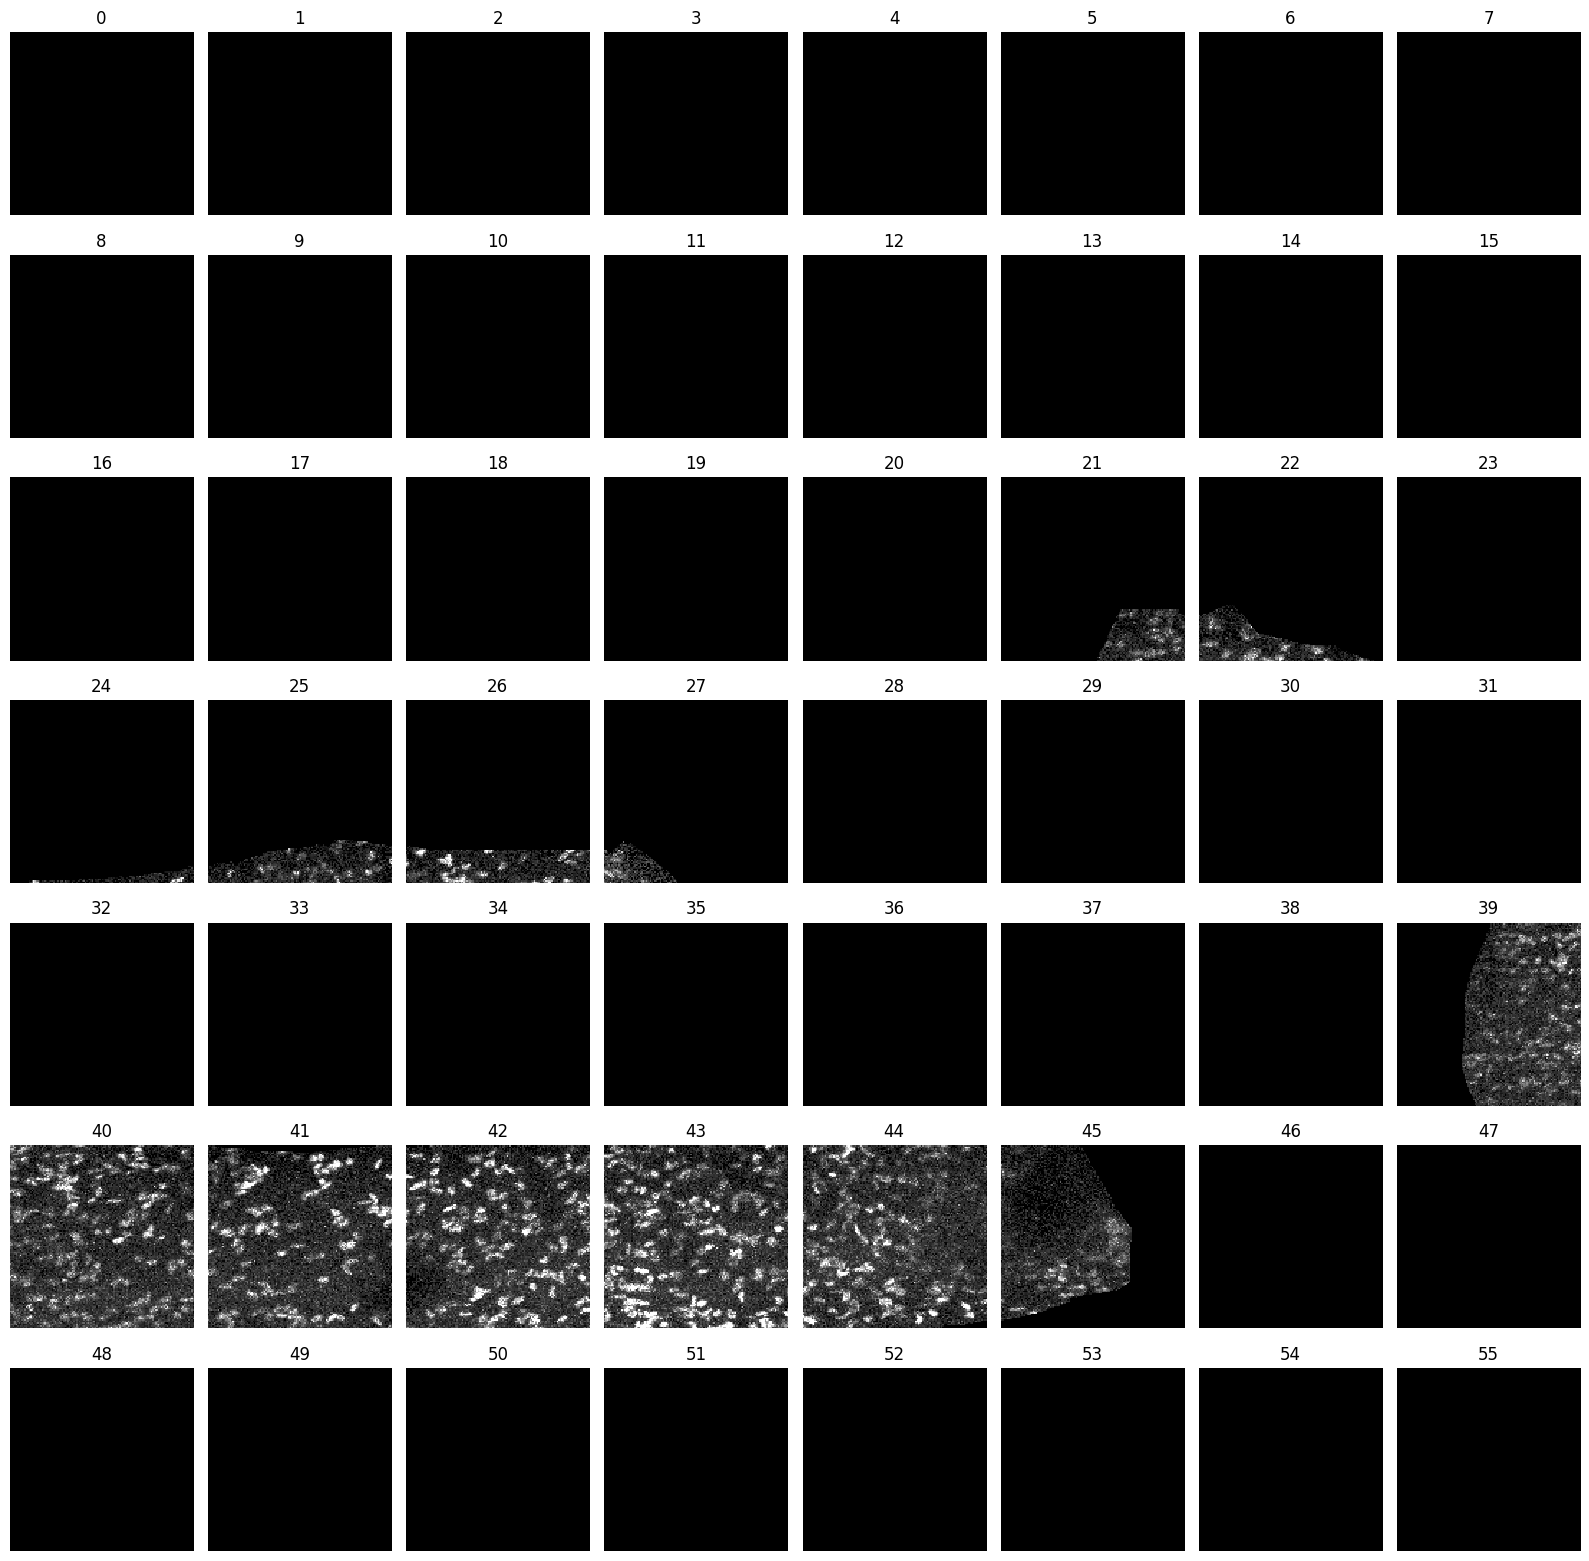

In [ ]:
fig, ax = plt.subplots(7,8, figsize=(16,16))
for i,(a,x) in enumerate(zip(ax.flat, X)):
  a.imshow(x if x.ndim==2 else x[...,0], cmap='gray')
  a.set_title(i)
  [a.axis('off') for a in ax.flat]
  plt.tight_layout()

In [ ]:
model = StarDist2D(None, name='stardist_tutorial_small', basedir='/content/drive/MyDrive/Colab Notebooks/models')

Loading network weights from 'weights_best_small.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.384205, nms_thresh=0.3.


In [ ]:
# model = StarDist2D(None, name='stardist_tutorial', basedir='/content/drive/MyDrive/Colab Notebooks/models')

In [ ]:
from random import randint

In [ ]:
def plot_img_label(img, lbl, img_title="image", lbl_title="label", **kwargs):
    fig, (ai,al) = plt.subplots(1,2, figsize=(12,5), gridspec_kw=dict(width_ratios=(1.25,1)))
    im = ai.imshow(img, cmap='gray', clim=(0,1))
    ai.set_title(img_title)
    fig.colorbar(im, ax=ai)
    al.imshow(lbl, cmap=lbl_cmap)
    al.set_title(lbl_title)
    plt.tight_layout()

<Figure size 800x800 with 0 Axes>

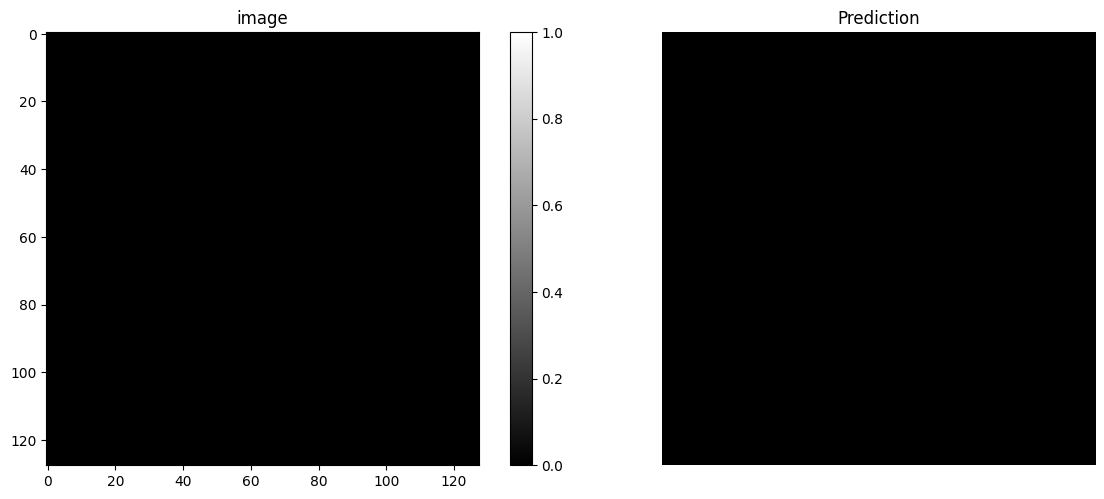

In [ ]:
# img_num = randint(0, len(X)-1)
img = X[1]
# img = normalize(X[16], 1,99.8, axis=axis_norm)
labels, details = model.predict_instances(img)


# plt.figure(figsize=(8,8))
# plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
# plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
# plt.axis('off');


plt.figure(figsize=(8,8))  # You can adjust the figure size as needed
plot_img_label(img, labels, lbl_title="Prediction")
plt.axis('off')
plt.show()

# Next, we display the prediction image
# plt.figure(figsize=(8,8))  # Adjust the figure size here as well
# plot_img_label(img, render_label(labels, img=img), lbl_title="prediction")
# plt.axis('off')
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
# drive.mount('/content/drive')

# Set the path to the directory where the results will be saved
results_dir = '/content/drive/MyDrive/Colab Notebooks/Undeformed_Prediction_Visuals'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Loop through all images in X
for i, img in enumerate(X):
    # Normalize and predict instances (uncomment if normalization is necessary)
    # img = normalize(img, 1, 99.8, axis=axis_norm)
    labels, details = model.predict_instances(img)

    # Plotting
    plt.figure(figsize=(8,8))
    plot_img_label(img, labels, lbl_title=f"Prediction_{i + 10}")
    plt.axis('off')

    # Save the figure
    save_path = os.path.join(results_dir, f"prediction_{i + 10}.png")
    plt.savefig(save_path)
    plt.close()

print("All images processed and saved.")


<ipython-input-17-977b46e245bf> (2): More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
<ipython-input-25-30576b602e30> (20): More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


All images processed and saved.


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [ ]:
import imageio
import os
results_dir = '/content/drive/MyDrive/Colab Notebooks/Undeformed_Prediction_Tiles'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
for i, img in enumerate(X):
    labels, details = model.predict_instances(img)

    # Set up the figure with an exact size in pixels
    fig, ax = plt.subplots()
    dpi = 100  # Define the DPI setting for the figure
    fig.set_size_inches(128 / dpi, 128 / dpi)  # Convert pixels to inches for matplotlib

    # Plot and configure the appearance
    ax.imshow(labels, cmap='nipy_spectral', aspect='equal')
    ax.axis('off')  # Hide axes

    # Remove padding and margins from the figure
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Save the figure
    save_path = os.path.join(results_dir, f"prediction_tiles_{i + 10}.png")
    plt.savefig(save_path, dpi=dpi, transparent=True)  # Force the DPI setting for output file
    plt.close(fig)

In [ ]:
X = '/content/drive/MyDrive/Colab Notebooks/thumbnail_max_projection_streteched_cropped.png'

X = Image.open(X)

# Convert the image to grayscale
X = X.convert('L')  # 'L' mode is for grayscale

# If needed, convert to a numpy array
X = np.array(X)

In [ ]:
X.shape

(256, 640)

In [ ]:
axis_norm = (0,1)
X_norm = normalize(X, 1,99.8, axis=axis_norm)

In [ ]:
model = StarDist2D(None, name='stardist_tutorial_small', basedir='/content/drive/MyDrive/Colab Notebooks/models')

Loading network weights from 'weights_best_small.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.373812, nms_thresh=0.3.


In [ ]:
segmented_img, details_img = model.predict_instances(X_norm, verbose=True)

predicting instances with nms_thresh = 0.3
non-maximum suppression...
keeping 203/926 polyhedra
NMS took 0.0289 s


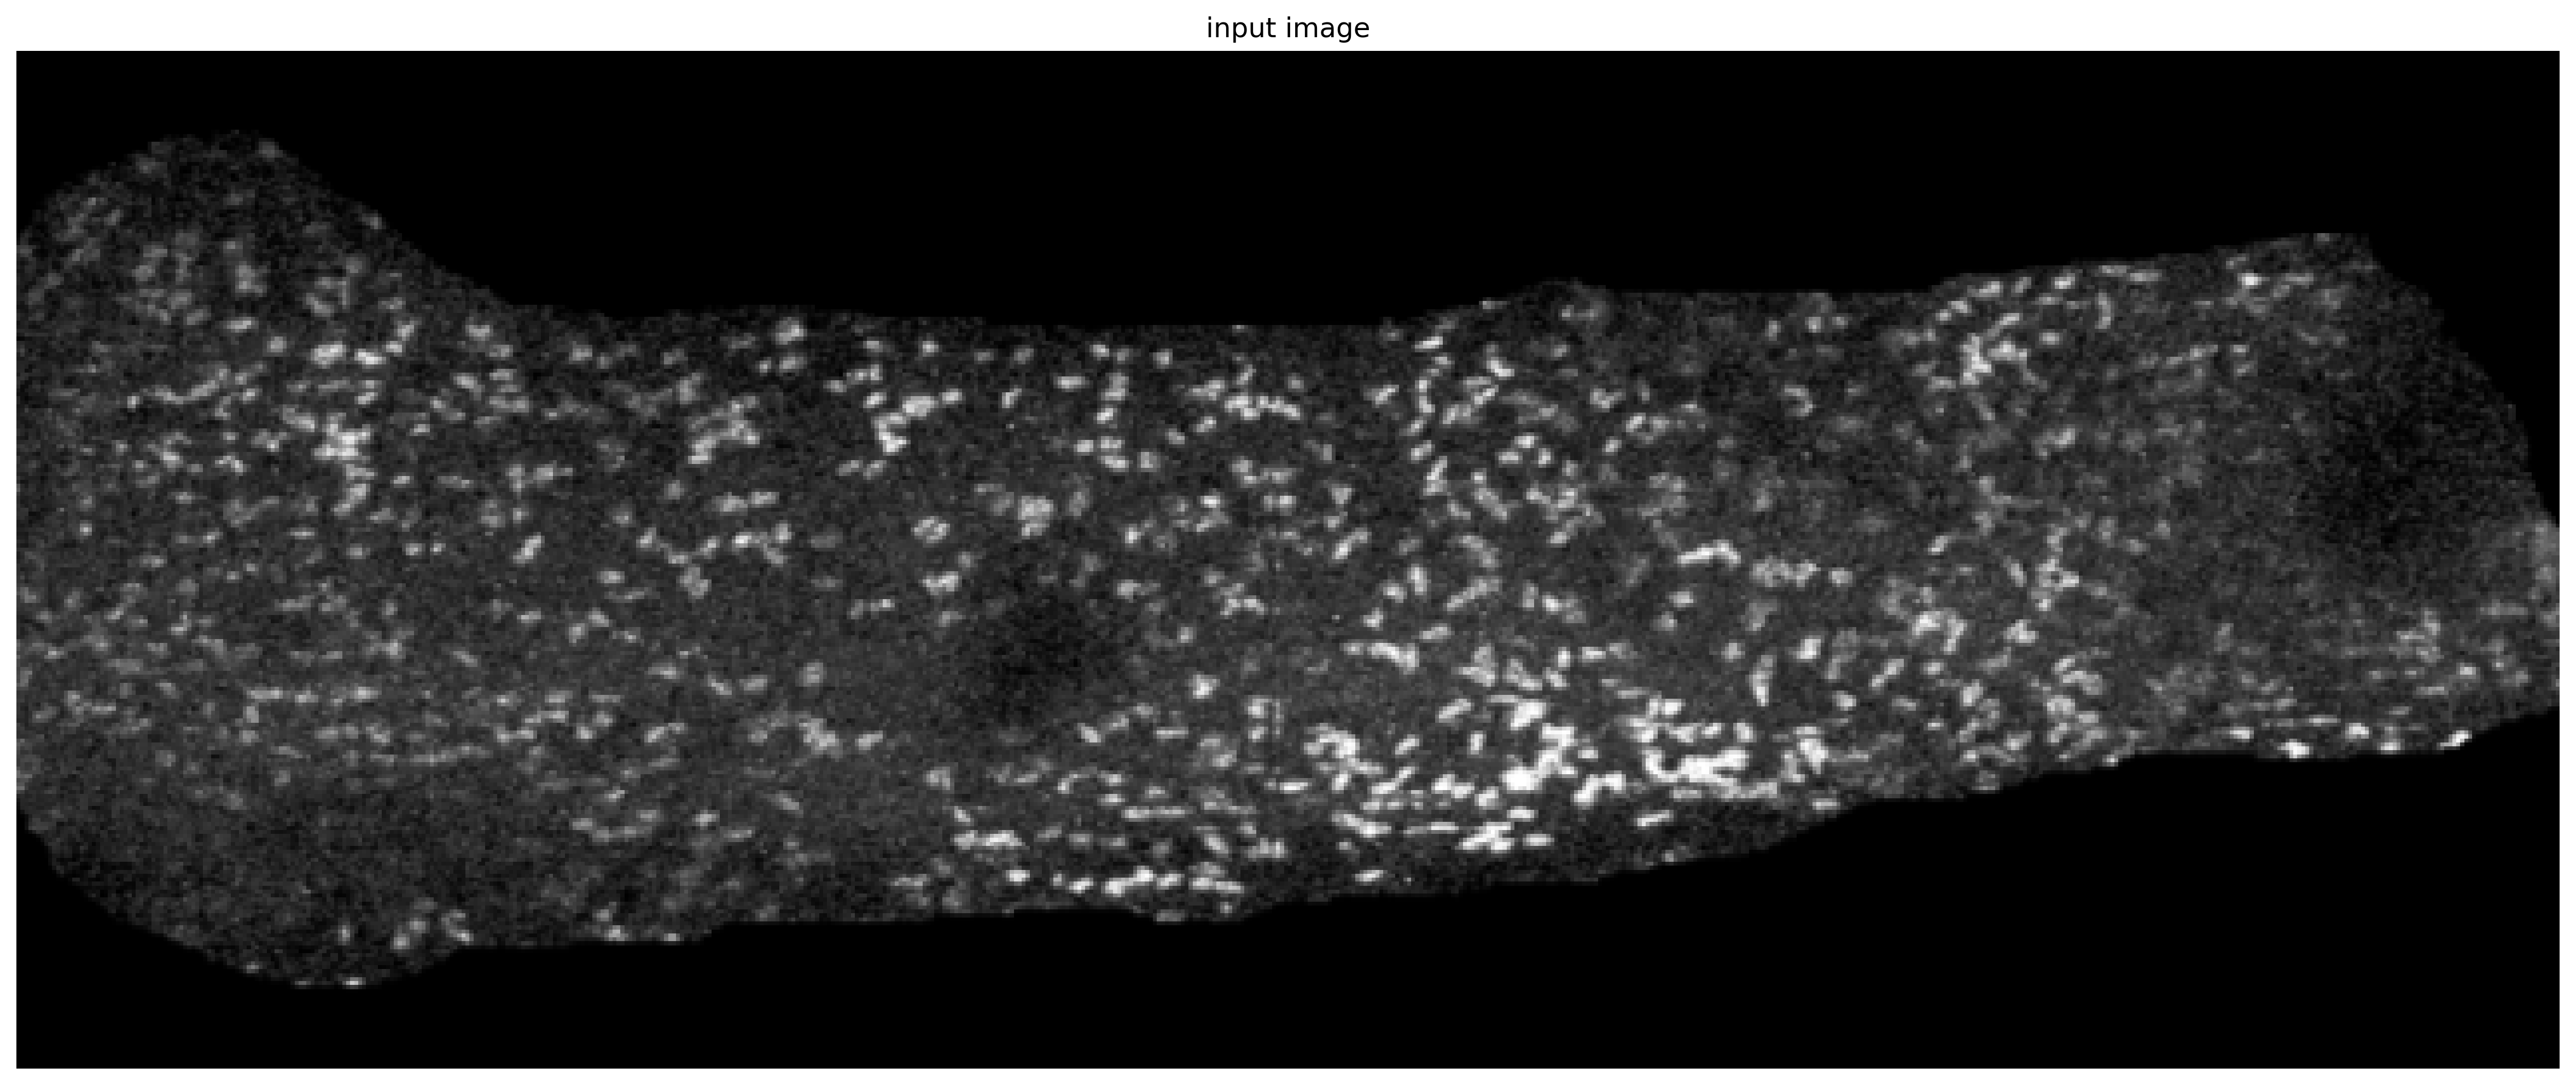

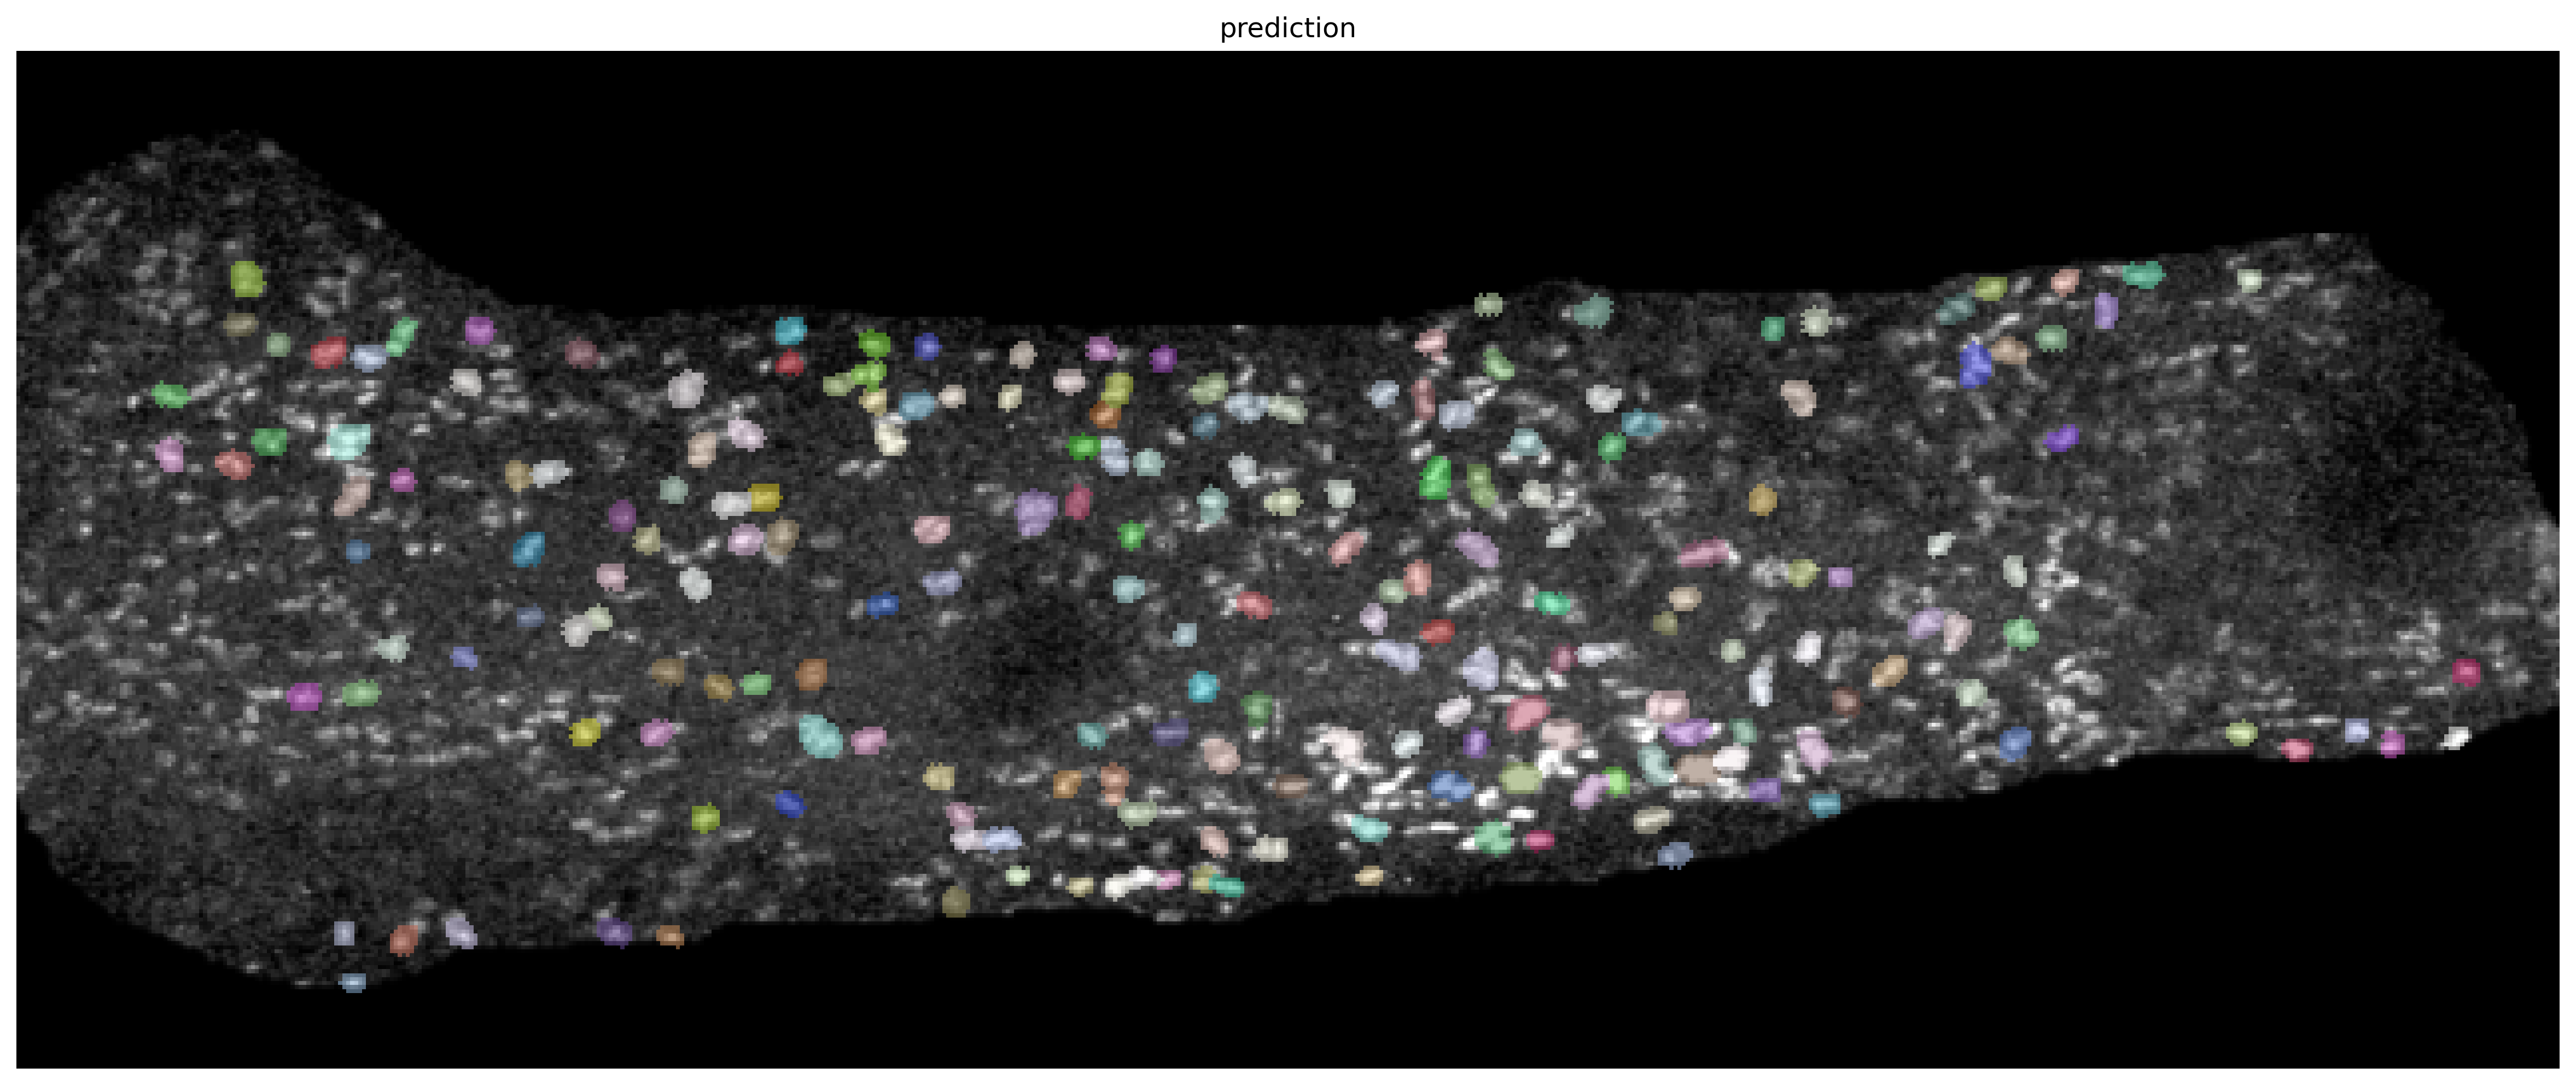

In [ ]:
width_in_inches = 20  # You can adjust this to your preference
height_in_inches = 10 # You can adjust this as well

# First Image - Input Image
plt.figure(figsize=(width_in_inches, height_in_inches))
plt.imshow(X_norm, cmap="gray")
plt.axis("off")
plt.title("input image")
plt.show()

# Second Image - Prediction
plt.figure(figsize=(width_in_inches, height_in_inches))
plt.imshow(render_label(segmented_img, img=X_norm))
plt.axis("off")
plt.title("prediction")
plt.show()

In [ ]:
model = StarDist2D(None, name='stardist_tutorial', basedir='/content/drive/MyDrive/Colab Notebooks/models')

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.354203, nms_thresh=0.3.


In [ ]:
segmented_img, details_img = model.predict_instances(X_norm, verbose=True)

predicting instances with nms_thresh = 0.3
non-maximum suppression...
keeping 263/1189 polyhedra
NMS took 0.0945 s


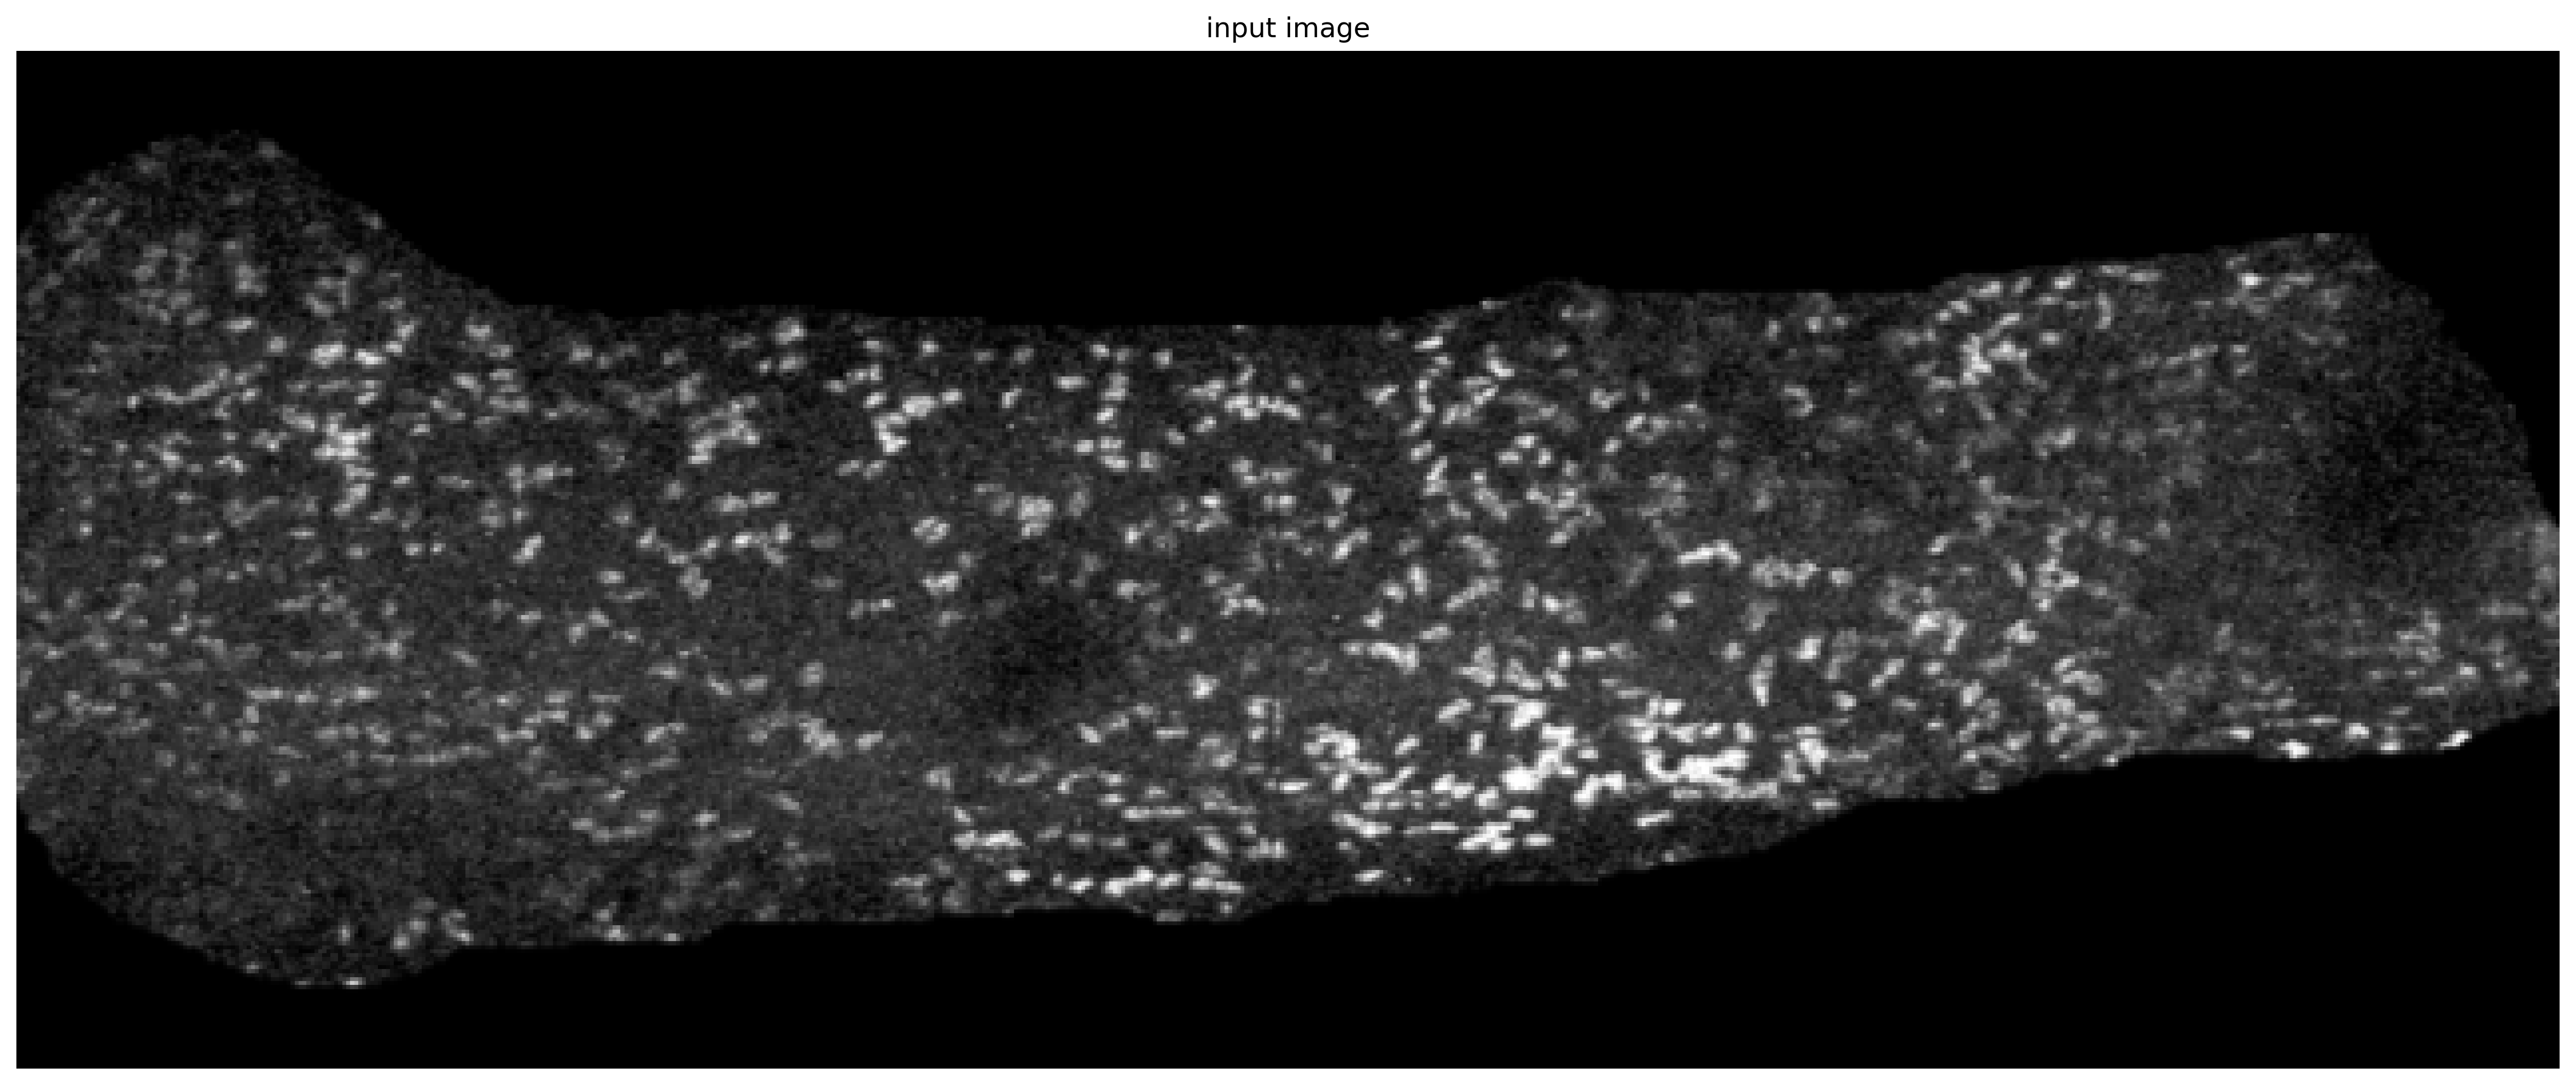

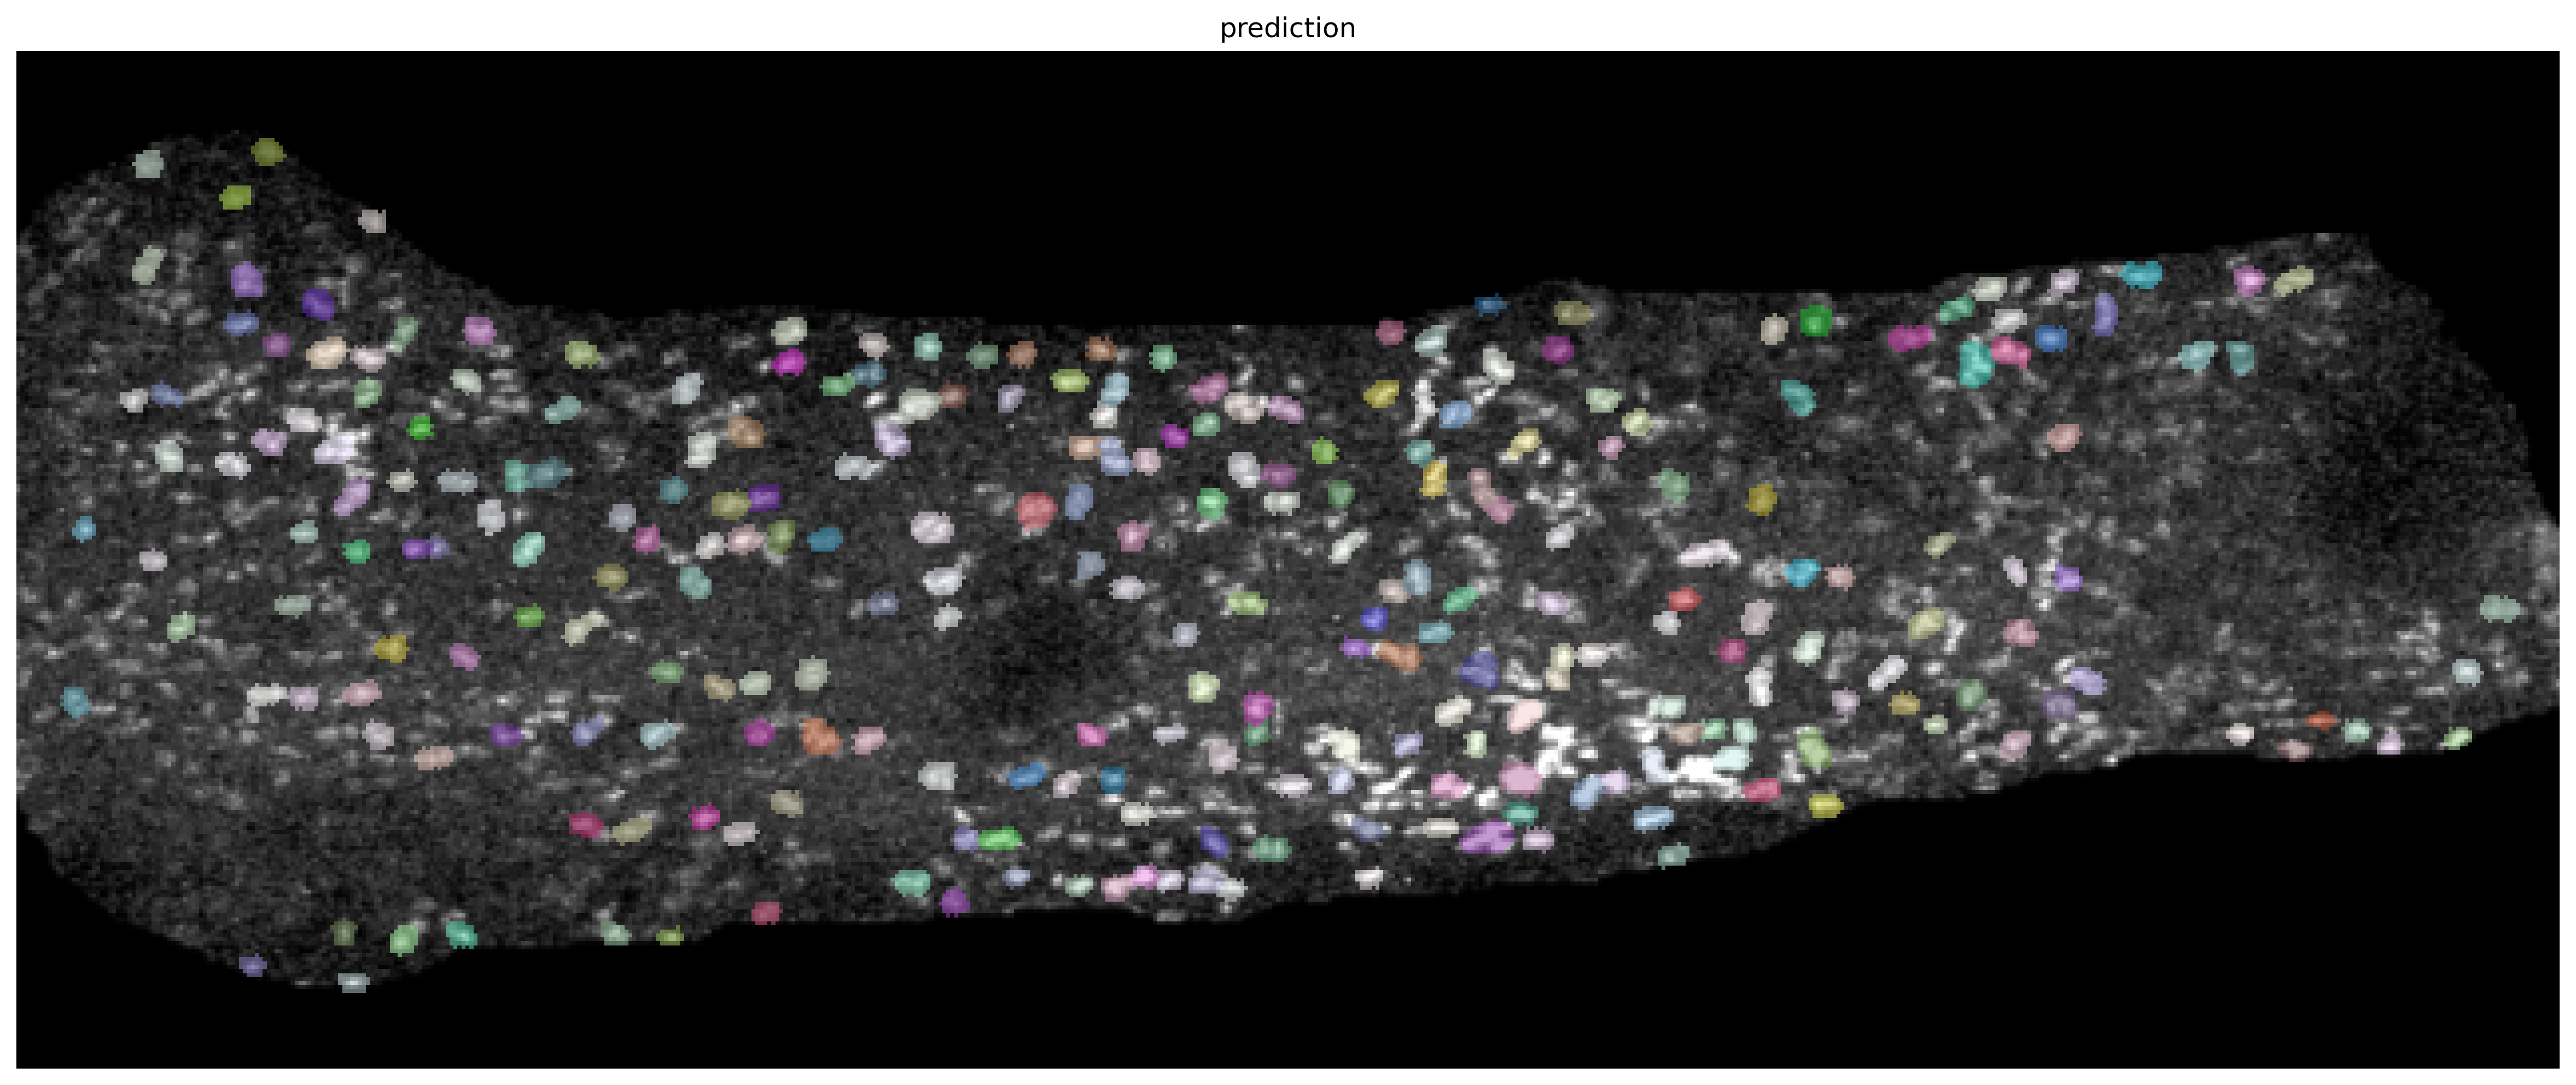

In [ ]:
width_in_inches = 20  # You can adjust this to your preference
height_in_inches = 10 # You can adjust this as well

# First Image - Input Image
plt.figure(figsize=(width_in_inches, height_in_inches))
plt.imshow(X_norm, cmap="gray")
plt.axis("off")
plt.title("input image")
plt.show()

# Second Image - Prediction
plt.figure(figsize=(width_in_inches, height_in_inches))
plt.imshow(render_label(segmented_img, img=X_norm))
plt.axis("off")
plt.title("prediction")
plt.show()